# assignment 1
## import libraries and loading data

In [1]:
#1a
import numpy as np #supports large multi dimensional arrays
import pandas as pd # panda is used for data manipulation and analysis
import matplotlib.pyplot as plot # used for creating graphs 
# following code is used for cosmetic purpose
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)

# load data set with excel values
dset = pd.read_csv('auto-mpg.csv')
rowcount = len(dset)  #row counter 


## cleaning data set

In [17]:
#print the amount of rows
print("number of record of the dataset :")
print(rowcount,'Records\n')
# [[1b]] data type
print('the following is the data types of each columns')
print(dset.dtypes,"\n")

#starting to clean up the data set
# [[1c]] drop any duplicates and indicate if rows are removed
dataset=dset.drop_duplicates()
rowcountremoved = len(dataset)

#if there are rows removed indicate it|
if rowcountremoved<rowcount:
    print('Duplicate Rows removed\n')
elif rowcountremoved==rowcount:
    print('No duplicate found\n')
    
# [[1b]] remove irreleveant columns
dataset=dataset.drop('car',axis=1)

    
# [[1d]] Check and impute missing values
#because there is sufficiant data and the missing data row is low in relation to the entire dataset,i will drop the row of the missing values to remove bias
dataset.replace("?",np.nan,inplace =True)# replace the ? symbols in the records with NaN values
dataset.dropna(inplace = True)# remove all rows that contain NaN values
dataset['horsepower']=dataset['horsepower'].astype(int)# after removing all ? symbols convert the horsepower coloumn to int type
print('number of records after removing NaN values: ')
print(len(dataset),"Records\n")

#five-number summary
#Check and remove outliers
#equations to detect outliers
print('five-number summary of each feature\n')
dataset.describe()
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1
# details about quantile details
print('Q1 calculations')
print(Q1,'\n')
print('Q3 calculations')
print(Q3,'\n')
print('Iqr calculations')
print(IQR)

#replace dataset with itself excluding outliers
dataset = dataset[~((dataset < (Q1 - 1.5 * IQR)) |(dataset > (Q3 + 1.5 * IQR))).any(axis=1)]
print('\nnumber of records after removing outliers :')
print(len(dataset))

# [[a]] creates mpg01 column
mpg01=[]
column=dataset.iloc[:,0]# cal mean
mean = np.mean(column)
print('\nmean of mpg lable')
print(mean,'\n')
for item in column: # creates the mpg01 column
    if item > mean:
        mpg01.append(1)
    elif item < mean:
        mpg01.append(0)
        
#inserts mpg01 into the data set
dataset2= dataset.copy()
dataset2['mpg01']=mpg01


#create two new arrays mpgbelow were mpg01 = 0 and mpgabove were mpg01 = 1
mpgabove=np.array([])
mpgbelow=np.array([])
mpgabove= dataset2[(dataset2['mpg01']==1)] #creates an array that only holds records that contain mpg01 = 1
mpgbelow= dataset2[~(dataset2['mpg01']==1)] ##creates an array that only holds records that contain mpg01 = 0


 

number of record of the dataset :
398 Records

the following is the data types of each columns
mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model             int64
origin            int64
car              object
dtype: object 

No duplicate found

number of records after removing NaN values: 
392 Records

five-number summary of each feature

Q1 calculations
mpg               17.000
cylinders          4.000
displacement     105.000
horsepower        75.000
weight          2225.250
acceleration      13.775
model             73.000
origin             1.000
Name: 0.25, dtype: float64 

Q3 calculations
mpg               29.000
cylinders          8.000
displacement     275.750
horsepower       126.000
weight          3614.750
acceleration      17.025
model             79.000
origin             2.000
Name: 0.75, dtype: float64 

Iqr calculations
mpg               12.00
cylinders          4.00
di

## compare feature importance

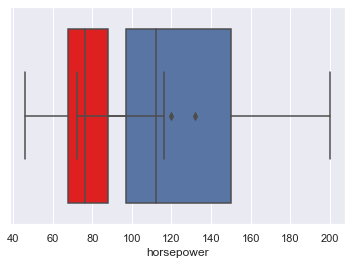

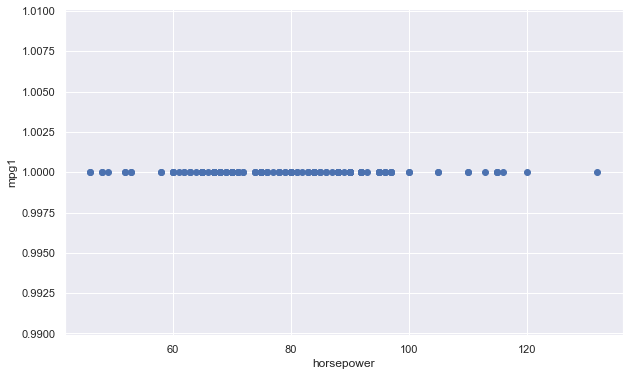

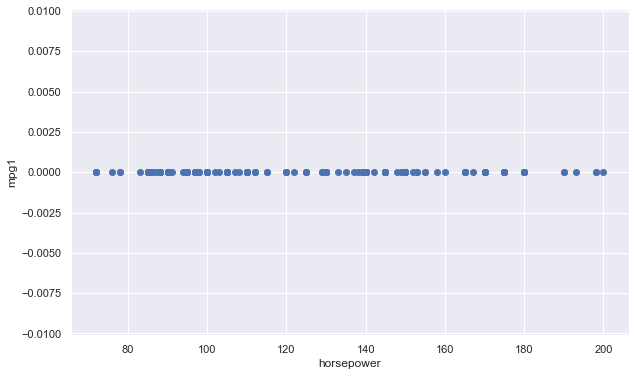

In [19]:

sns.boxplot(x = mpgabove['horsepower'],color = 'red')
sns.boxplot(x = mpgbelow['horsepower'])
# [[c]] here we can see that thare is a clear relationship between horsepower and mile per gallon(and vica verse) use, we can see that the higher the horsepower the higher the mile per gallon use thus this feature is usfull in our prediction
#scatter plots also show this relationship
fig, ax = plot.subplots(figsize=(10,6))
ax.scatter(mpgabove['horsepower'], mpgabove['mpg01'])
ax.set_xlabel('horsepower')
ax.set_ylabel('mpg1')
plot.show()
fig, ax = plot.subplots(figsize=(10,6))
ax.scatter(mpgbelow['horsepower'], mpgbelow['mpg01'])
ax.set_xlabel('horsepower')
ax.set_ylabel('mpg1')
plot.show()

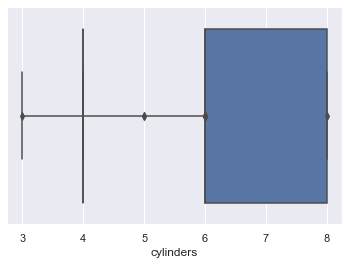

In [4]:
sns.boxplot(x = mpgabove['cylinders'],color = 'red')
sns.boxplot(x = mpgbelow['cylinders'])
# [[c]] here we can see that thare is a clear relationship between cylinders and mile per gallon use, we can see that the more cylinders the higher the mile per gallon(and vica verse) use thus this feature is usfull in our prediction


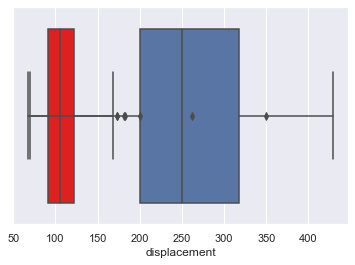

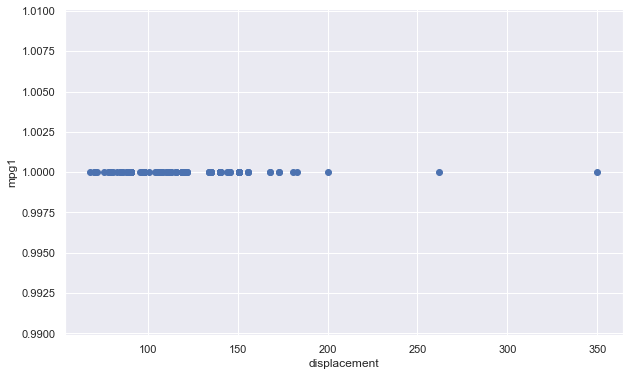

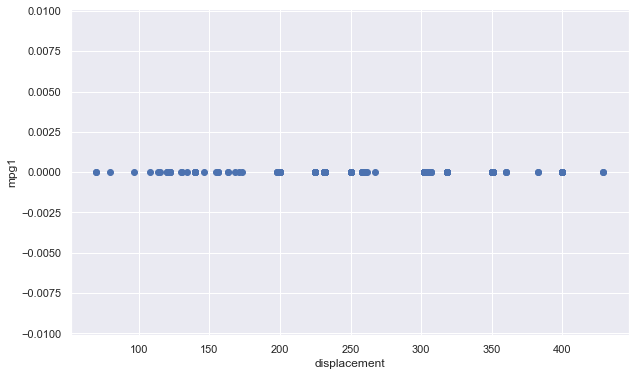

In [5]:
sns.boxplot(x = mpgabove['displacement'],color = 'red')
sns.boxplot(x = mpgbelow['displacement'])
# [[c]] here we can see that thare is a clear relationship between displacement and mile per gallon use, we can see that the more displacement the higher the mile per gallon(and vica verse) use thus this feature is usfull in our prediction
fig, ax = plot.subplots(figsize=(10,6))
ax.scatter(mpgabove['displacement'], mpgabove['mpg01'])
ax.set_xlabel('displacement')
ax.set_ylabel('mpg1')
plot.show()
fig, ax = plot.subplots(figsize=(10,6))
ax.scatter(mpgbelow['displacement'], mpgbelow['mpg01'])
ax.set_xlabel('displacement')
ax.set_ylabel('mpg1')
plot.show()

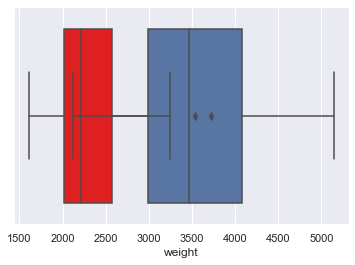

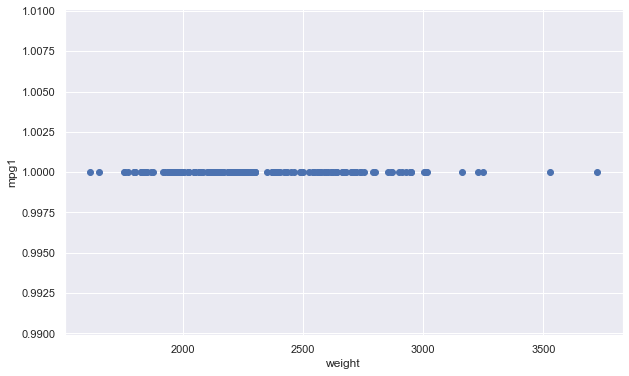

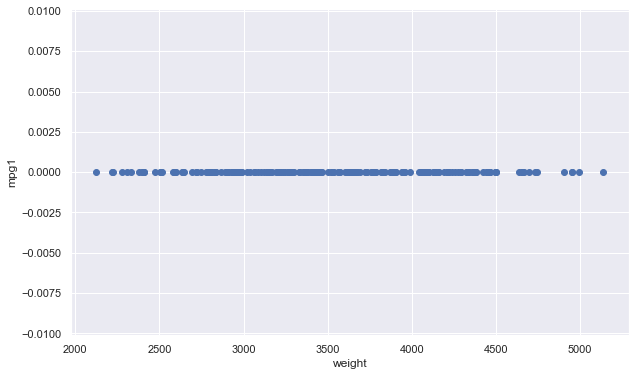

In [6]:
sns.boxplot(x = mpgabove['weight'],color = 'red')
sns.boxplot(x = mpgbelow['weight'])
# [[c]] here we can see that thare is a clear relationship between displacement and mile per gallon use, we can see that the the heivier the car the higher the mile per gallon(and vica verse) use thus this feature is usfull in our prediction
fig, ax = plot.subplots(figsize=(10,6))
ax.scatter(mpgabove['weight'], mpgabove['mpg01'])
ax.set_xlabel('weight')
ax.set_ylabel('mpg1')
plot.show()
fig, ax = plot.subplots(figsize=(10,6))
ax.scatter(mpgbelow['weight'], mpgbelow['mpg01'])
ax.set_xlabel('weight')
ax.set_ylabel('mpg1')
plot.show()

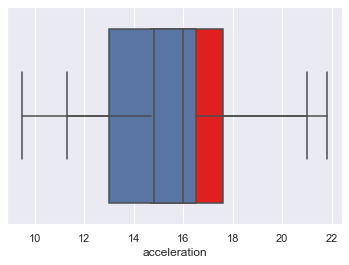

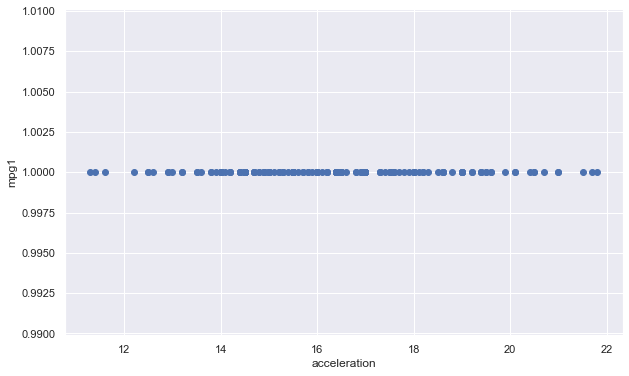

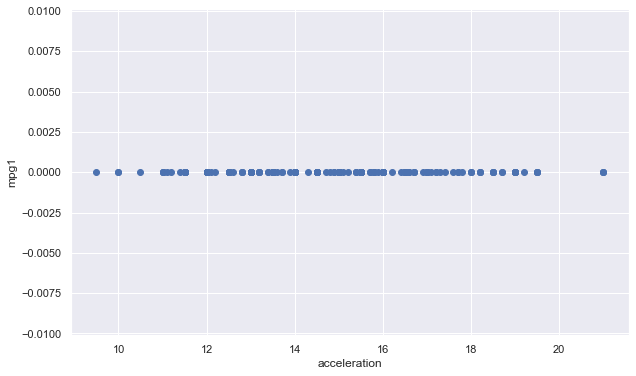

In [7]:
sns.boxplot(x = mpgabove['acceleration'],color = 'red')
sns.boxplot(x = mpgbelow['acceleration'])
# [[c]] here we can see that thare is a clear relationship between displacement and mile per gallon use, we can see that the faster a car accelerates the lower the mile per gallon(and vica verse) use thus this feature is usfull in our prediction
fig, ax = plot.subplots(figsize=(10,6))
ax.scatter(mpgabove['acceleration'], mpgabove['mpg01'])
ax.set_xlabel('acceleration')
ax.set_ylabel('mpg1')
plot.show()
fig, ax = plot.subplots(figsize=(10,6))
ax.scatter(mpgbelow['acceleration'], mpgbelow['mpg01'])
ax.set_xlabel('acceleration')
ax.set_ylabel('mpg1')
plot.show()

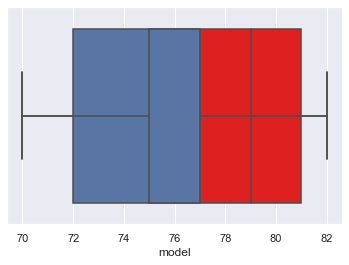

In [8]:

sns.boxplot(x = mpgabove['model'],color = 'red')
sns.boxplot(x = mpgbelow['model'])
# [[c]] here we can see that thare is a clear relationship between displacement and mile per gallon use, we can see that the newer car has the higher the mile per gallon(and vica verse) use thus this feature is usfull in our prediction

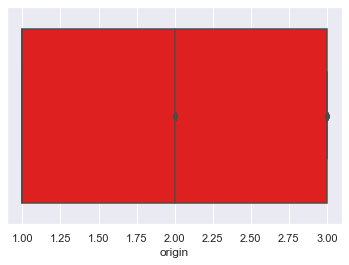

In [9]:

sns.boxplot(x = mpgabove['origin'],color = 'red')
sns.boxplot(x = mpgbelow['origin'])
# [[c]] here we can see that thare is a clear relationship between displacement and mile per gallon use, we can see that the higher the orgin  the higher the mile per gallon(and vica verse) use thus this feature is usfull in our prediction

## splitting features from lables

In [10]:
# splitting featres and lables
X = dataset2.iloc[:,1:-1].values
Y = dataset2.iloc[:,-1].values


## testing

In [24]:
# [[d]] split data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30)

#standardize features

#standard scaler
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
X_train[:, :] = sc.fit_transform(X_train[:,:])
X_test[:, :] = sc.transform(X_test[:,:])

#min max scaler
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X_train[:, :] = scaler.fit_transform(X_train[:,:])
#X_test[:, :] = scaler.transform(X_test[:,:])

# models

# linear regression model
#from sklearn.linear_model import LinearRegression  
#model = LinearRegression()  
#model.fit(X_train, y_train)

#naive bayes model
#from sklearn.naive_bayes import MultinomialNB
#model = MultinomialNB()

#logistic regression
# im going to use logistic regression model because it is best suited for when the label values are categorical rather than numerical
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(X_train, y_train)

# Returns a list of predicted classes - one prediction for every data point
predictions = model.predict(X_test)
 
# For every data point, returns a list of probabilities of each class
probabilities = model.predict_proba(X_test)




# prediction
y_pred = model.predict(X_test)
print("sample table of 30 predictions :")
y_act_y_pre = pd.DataFrame({" Actual": y_test[:30],"Predicted": y_pred[:30]})
print(y_act_y_pre)

#importing sklearn library for details about model
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

#gives scoreing on the predictions
print("sample table of 30 predictions :")
print("accuracy: ",accuracy_score(y_test, y_pred))
print("recall: ",recall_score(y_test, y_pred))
print("precision: ",precision_score(y_test, y_pred))
print("precision: ",f1_score(y_test, y_pred))

sample table of 30 predictions :
     Actual  Predicted
0         1          1
1         1          1
2         0          0
3         1          1
4         1          1
5         0          0
6         1          1
7         1          1
8         1          1
9         0          0
10        1          1
11        0          0
12        0          0
13        1          1
14        0          0
15        1          1
16        0          0
17        1          1
18        1          1
19        1          1
20        1          0
21        0          1
22        0          0
23        0          1
24        0          0
25        0          0
26        0          0
27        1          1
28        1          1
29        0          0
sample table of 30 predictions :
accuracy:  0.9017857142857143
recall:  0.9464285714285714
precision:  0.8688524590163934
precision:  0.9059829059829059


C:\Users\User-PC\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
